<a href="https://colab.research.google.com/github/HAQ-NAWAZ-MALIK/Projects-2025/blob/main/Pyspark_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Comprehensive PySpark ML Lab
# ===========================

# Cell 1: Setup and Initialization
# ---------------------------------
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler, OneHotEncoder
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier
from pyspark.ml.regression import LinearRegression, RandomForestRegressor, GBTRegressor
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, RegressionEvaluator, ClusteringEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.sql.functions import col, expr, when, udf
from pyspark.sql.types import DoubleType, StringType, IntegerType
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Comprehensive Spark ML Lab") \
    .config("spark.executor.memory", "2g") \
    .config("spark.driver.memory", "2g") \
    .master("local[*]") \
    .getOrCreate()

print("Spark version:", spark.version)
print("Spark UI available at:", spark.sparkContext.uiWebUrl)

Spark version: 3.5.5
Spark UI available at: http://d26f916083fa:4040


In [2]:

# Cell 2: Load Dataset - Classification Example with Iris dataset
# --------------------------------------------------------------
# Load the popular Iris dataset directly from UCI repository
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# Load data using Spark's read.csv
iris_df = spark.read.csv(iris_url, header=False, inferSchema=True)
iris_df = iris_df.toDF(*column_names)

# Show the dataset
print("Iris Dataset:")
iris_df.show(5)
print("Schema:")
iris_df.printSchema()

UnsupportedOperationException: None

In [3]:
import requests
import io

# Cell 2: Load Dataset - Classification Example with Iris dataset
# --------------------------------------------------------------
# Load the popular Iris dataset directly from UCI repository
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# Fetch data from the URL
response = requests.get(iris_url)
response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
iris_data = response.text

# Create a file-like object from the data
iris_file = io.StringIO(iris_data)

# Load data using Spark's read.csv from the file-like object
iris_df = spark.read.csv(iris_file, header=False, inferSchema=True)
iris_df = iris_df.toDF(*column_names)

# Show the dataset
print("Iris Dataset:")
iris_df.show(5)
print("Schema:")
iris_df.printSchema()

PySparkTypeError: [NOT_STR_OR_LIST_OF_RDD] Argument `path` should be a str or list[RDD], got StringIO.

In [4]:
import requests
import io

# Cell 2: Load Dataset - Classification Example with Iris dataset
# --------------------------------------------------------------
# Load the popular Iris dataset directly from UCI repository
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# Fetch data from the URL
response = requests.get(iris_url)
response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
iris_data = response.text

# Create a temporary file to store the data
import tempfile
with tempfile.NamedTemporaryFile(mode='w', delete=False) as temp_file:
    temp_file.write(iris_data)
    temp_file_path = temp_file.name

# Load data using Spark's read.csv from the temporary file path
iris_df = spark.read.csv(temp_file_path, header=False, inferSchema=True)
iris_df = iris_df.toDF(*column_names)

# Show the dataset
print("Iris Dataset:")
iris_df.show(5)
print("Schema:")
iris_df.printSchema()

Iris Dataset:
+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|    species|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
+------------+-----------+------------+-----------+-----------+
only showing top 5 rows

Schema:
root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)



In [5]:
# Cell 3: Exploratory Data Analysis (EDA)
# ---------------------------------------
# Convert to Pandas for visualization
iris_pd = iris_df.toPandas()

# Display summary statistics
print("Summary Statistics:")
iris_df.describe().show()

# Count classes
print("Class Distribution:")
iris_df.groupBy("species").count().show()

# Sample visualization (run in local mode)
def visualize_iris():
    # Create a pairplot
    sns.pairplot(iris_pd, hue="species", height=2.5)
    plt.title("Iris Dataset Pairplot")
    plt.tight_layout()
    plt.show()

    # Feature distributions by class
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

    for i, feature in enumerate(features):
        row, col = i // 2, i % 2
        sns.boxplot(x="species", y=feature, data=iris_pd, ax=axes[row, col])
        axes[row, col].set_title(f"{feature} by Species")

    plt.tight_layout()
    plt.show()

# Call the visualization function (comment out when running on cluster)
# visualize_iris()

Summary Statistics:
+-------+------------------+-------------------+------------------+------------------+--------------+
|summary|      sepal_length|        sepal_width|      petal_length|       petal_width|       species|
+-------+------------------+-------------------+------------------+------------------+--------------+
|  count|               150|                150|               150|               150|           150|
|   mean| 5.843333333333335| 3.0540000000000007|3.7586666666666693|1.1986666666666672|          NULL|
| stddev|0.8280661279778637|0.43359431136217375| 1.764420419952262|0.7631607417008414|          NULL|
|    min|               4.3|                2.0|               1.0|               0.1|   Iris-setosa|
|    max|               7.9|                4.4|               6.9|               2.5|Iris-virginica|
+-------+------------------+-------------------+------------------+------------------+--------------+

Class Distribution:
+---------------+-----+
|        species|

In [6]:
# Cell 4: Data Preprocessing Pipeline
# -----------------------------------
# Create a feature processing pipeline for the Iris dataset

# 1. Convert string labels to indices
label_indexer = StringIndexer(inputCol="species", outputCol="label", handleInvalid="keep")

# 2. Combine features into a vector
feature_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features_raw")

# 3. Standardize features
scaler = StandardScaler(inputCol="features_raw", outputCol="features", withStd=True, withMean=True)

# Create the preprocessing pipeline
preprocessing_pipeline = Pipeline(stages=[label_indexer, assembler, scaler])

# Fit the pipeline to the data
preprocessing_model = preprocessing_pipeline.fit(iris_df)
processed_data = preprocessing_model.transform(iris_df)

# Show the processed data
print("Processed Data:")
processed_data.select("features", "label", "species").show(5)

Processed Data:
+--------------------+-----+-----------+
|            features|label|    species|
+--------------------+-----+-----------+
|[-0.8976738791967...|  0.0|Iris-setosa|
|[-1.1392004834649...|  0.0|Iris-setosa|
|[-1.3807270877331...|  0.0|Iris-setosa|
|[-1.5014903898672...|  0.0|Iris-setosa|
|[-1.0184371813308...|  0.0|Iris-setosa|
+--------------------+-----+-----------+
only showing top 5 rows



In [7]:
# Cell 5: Train-Test Split
# ------------------------
# Split the data into training and test sets
(train_data, test_data) = processed_data.randomSplit([0.8, 0.2], seed=42)

print(f"Training Data Count: {train_data.count()}")
print(f"Test Data Count: {test_data.count()}")

Training Data Count: 126
Test Data Count: 24


In [8]:
# Cell 6: Classification Models
# ----------------------------
# 1. Logistic Regression
lr = LogisticRegression(featuresCol="features", labelCol="label", maxIter=10, regParam=0.1)
lr_model = lr.fit(train_data)

# Evaluate the model
lr_predictions = lr_model.transform(test_data)
lr_predictions.select("label", "prediction", "species").show(10)

# Calculate evaluation metrics
evaluator = MulticlassClassificationEvaluator(
    labelCol="label",
    predictionCol="prediction",
    metricName="accuracy")

lr_accuracy = evaluator.evaluate(lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

# Display the model coefficients and intercept
print("Coefficients: ")
for i, coef in enumerate(lr_model.coefficientMatrix.toArray()):
    print(f"Class {i}: {coef}")
print(f"Intercepts: {lr_model.interceptVector}")

# 2. Random Forest Classifier
rf = RandomForestClassifier(
    featuresCol="features",
    labelCol="label",
    numTrees=10,
    maxDepth=5,
    seed=42)

rf_model = rf.fit(train_data)
rf_predictions = rf_model.transform(test_data)

rf_accuracy = evaluator.evaluate(rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Feature importance
rf_importance = rf_model.featureImportances
for i, importance in enumerate(rf_importance):
    print(f"Feature {feature_cols[i]}: {importance:.4f}")

# 3. Gradient-Boosted Tree Classifier
gbt = GBTClassifier(
    featuresCol="features",
    labelCol="label",
    maxIter=10,
    maxDepth=5,
    seed=42)

gbt_model = gbt.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)

gbt_accuracy = evaluator.evaluate(gbt_predictions)
print(f"GBT Classifier Accuracy: {gbt_accuracy:.4f}")

+-----+----------+---------------+
|label|prediction|        species|
+-----+----------+---------------+
|  0.0|       0.0|    Iris-setosa|
|  0.0|       0.0|    Iris-setosa|
|  0.0|       0.0|    Iris-setosa|
|  0.0|       0.0|    Iris-setosa|
|  0.0|       0.0|    Iris-setosa|
|  1.0|       1.0|Iris-versicolor|
|  0.0|       0.0|    Iris-setosa|
|  0.0|       0.0|    Iris-setosa|
|  0.0|       0.0|    Iris-setosa|
|  1.0|       1.0|Iris-versicolor|
+-----+----------+---------------+
only showing top 10 rows

Logistic Regression Accuracy: 1.0000
Coefficients: 
Class 0: [-0.46945241  0.43463717 -0.70657548 -0.65697507]
Class 1: [ 0.13384701 -0.35907134  0.08185295 -0.158005  ]
Class 2: [ 0.33835446 -0.08785433  0.6325168   0.8223808 ]
Class 3: [-0.00274906  0.0122885  -0.00779426 -0.00740073]
Intercepts: [0.9366283321158813,1.823937659162212,0.9329839149049904,-3.693549906183084]
Random Forest Accuracy: 0.9583
Feature sepal_length: 0.0545
Feature sepal_width: 0.0157
Feature petal_lengt

Py4JJavaError: An error occurred while calling o545.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 55.0 failed 1 times, most recent failure: Lost task 0.0 in stage 55.0 (TID 49) (d26f916083fa executor driver): java.lang.RuntimeException: Labels MUST be in {0, 1}, but got 2.0
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.project_doConsume_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.TraversableOnce.foldLeft(TraversableOnce.scala:199)
	at scala.collection.TraversableOnce.foldLeft$(TraversableOnce.scala:192)
	at scala.collection.AbstractIterator.foldLeft(Iterator.scala:1431)
	at scala.collection.TraversableOnce.aggregate(TraversableOnce.scala:260)
	at scala.collection.TraversableOnce.aggregate$(TraversableOnce.scala:260)
	at scala.collection.AbstractIterator.aggregate(Iterator.scala:1431)
	at org.apache.spark.rdd.RDD.$anonfun$aggregate$2(RDD.scala:1226)
	at org.apache.spark.SparkContext.$anonfun$runJob$6(SparkContext.scala:2487)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2393)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2488)
	at org.apache.spark.rdd.RDD.$anonfun$aggregate$1(RDD.scala:1228)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.aggregate(RDD.scala:1221)
	at org.apache.spark.ml.tree.impl.DecisionTreeMetadata$.buildMetadata(DecisionTreeMetadata.scala:125)
	at org.apache.spark.ml.tree.impl.GradientBoostedTrees$.boost(GradientBoostedTrees.scala:333)
	at org.apache.spark.ml.tree.impl.GradientBoostedTrees$.run(GradientBoostedTrees.scala:61)
	at org.apache.spark.ml.classification.GBTClassifier.$anonfun$train$1(GBTClassifier.scala:201)
	at org.apache.spark.ml.util.Instrumentation$.$anonfun$instrumented$1(Instrumentation.scala:191)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.ml.util.Instrumentation$.instrumented(Instrumentation.scala:191)
	at org.apache.spark.ml.classification.GBTClassifier.train(GBTClassifier.scala:170)
	at org.apache.spark.ml.classification.GBTClassifier.train(GBTClassifier.scala:58)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:114)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: java.lang.RuntimeException: Labels MUST be in {0, 1}, but got 2.0
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.project_doConsume_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.TraversableOnce.foldLeft(TraversableOnce.scala:199)
	at scala.collection.TraversableOnce.foldLeft$(TraversableOnce.scala:192)
	at scala.collection.AbstractIterator.foldLeft(Iterator.scala:1431)
	at scala.collection.TraversableOnce.aggregate(TraversableOnce.scala:260)
	at scala.collection.TraversableOnce.aggregate$(TraversableOnce.scala:260)
	at scala.collection.AbstractIterator.aggregate(Iterator.scala:1431)
	at org.apache.spark.rdd.RDD.$anonfun$aggregate$2(RDD.scala:1226)
	at org.apache.spark.SparkContext.$anonfun$runJob$6(SparkContext.scala:2487)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more


In [9]:
# Cell 6: Classification Models
# ----------------------------
# ... (other code) ...

# 3. Random Forest Classifier (for multi-class)
gbt = RandomForestClassifier(  # Replace GBTClassifier with RandomForestClassifier
    featuresCol="features",
    labelCol="label",
    numTrees=10,
    maxDepth=5,
    seed=42)

gbt_model = gbt.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)

gbt_accuracy = evaluator.evaluate(gbt_predictions)
print(f"Random Forest Classifier Accuracy: {gbt_accuracy:.4f}")

Random Forest Classifier Accuracy: 0.9583


In [10]:
# Cell 7: Hyperparameter Tuning with Cross-Validation
# --------------------------------------------------
# Create a parameter grid for tuning the Random Forest model
paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [10, 20, 30]) \
    .addGrid(rf.maxDepth, [5, 10, 15]) \
    .build()

# Create a 3-fold CrossValidator
crossval = CrossValidator(
    estimator=rf,
    estimatorParamMaps=paramGrid,
    evaluator=evaluator,
    numFolds=3,
    seed=42
)

# Run cross-validation and select the best model
cv_model = crossval.fit(train_data)

# Get the best model
best_rf_model = cv_model.bestModel
print("Best Random Forest Model Parameters:")
print(f"Number of Trees: {best_rf_model.getNumTrees}")
print(f"Max Depth: {best_rf_model.getMaxDepth()}")

# Make predictions with the best model
best_predictions = best_rf_model.transform(test_data)
best_accuracy = evaluator.evaluate(best_predictions)
print(f"Best Random Forest Accuracy: {best_accuracy:.4f}")

Best Random Forest Model Parameters:
Number of Trees: 30
Max Depth: 5
Best Random Forest Accuracy: 1.0000


In [11]:
# Cell 8: Regression Example with California Housing Dataset
# ---------------------------------------------------------
# Load the California Housing dataset
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

# Convert to Pandas DataFrame first
california_pd = pd.DataFrame(
    data=np.c_[california.data, california.target],
    columns=list(california.feature_names) + ["price"]
)

# Convert to Spark DataFrame
california_df = spark.createDataFrame(california_pd)
california_df.show(5)
california_df.printSchema()

# Print summary statistics
california_df.describe().show()

+------+--------+------------------+------------------+----------+------------------+--------+---------+-----+
|MedInc|HouseAge|          AveRooms|         AveBedrms|Population|          AveOccup|Latitude|Longitude|price|
+------+--------+------------------+------------------+----------+------------------+--------+---------+-----+
|8.3252|    41.0| 6.984126984126984|1.0238095238095237|     322.0|2.5555555555555554|   37.88|  -122.23|4.526|
|8.3014|    21.0| 6.238137082601054|0.9718804920913884|    2401.0| 2.109841827768014|   37.86|  -122.22|3.585|
|7.2574|    52.0| 8.288135593220339| 1.073446327683616|     496.0|2.8022598870056497|   37.85|  -122.24|3.521|
|5.6431|    52.0|5.8173515981735155|1.0730593607305936|     558.0| 2.547945205479452|   37.85|  -122.25|3.413|
|3.8462|    52.0| 6.281853281853282|1.0810810810810811|     565.0|2.1814671814671813|   37.85|  -122.25|3.422|
+------+--------+------------------+------------------+----------+------------------+--------+---------+-----+
o

In [12]:

# Cell 9: Prepare Regression Data
# -------------------------------
# Prepare features for regression
reg_feature_cols = california.feature_names
reg_assembler = VectorAssembler(inputCols=reg_feature_cols, outputCol="features_raw")
reg_scaler = StandardScaler(inputCol="features_raw", outputCol="features", withStd=True, withMean=True)

# Create preprocessing pipeline
reg_preprocessing = Pipeline(stages=[reg_assembler, reg_scaler])

# Apply preprocessing
reg_preprocessing_model = reg_preprocessing.fit(california_df)
reg_processed_data = reg_preprocessing_model.transform(california_df)

# Split into training and test sets
(reg_train_data, reg_test_data) = reg_processed_data.randomSplit([0.8, 0.2], seed=42)

print(f"Regression Training Data Count: {reg_train_data.count()}")
print(f"Regression Test Data Count: {reg_test_data.count()}")

Regression Training Data Count: 16637
Regression Test Data Count: 4003


In [13]:

# Cell 10: Regression Models
# -------------------------
# 1. Linear Regression
lin_reg = LinearRegression(
    featuresCol="features",
    labelCol="price",
    maxIter=10,
    regParam=0.1,
    elasticNetParam=0.8
)

lin_reg_model = lin_reg.fit(reg_train_data)
lin_reg_predictions = lin_reg_model.transform(reg_test_data)

# Evaluate regression model
reg_evaluator = RegressionEvaluator(
    labelCol="price",
    predictionCol="prediction",
    metricName="rmse"
)

lin_reg_rmse = reg_evaluator.evaluate(lin_reg_predictions)
lin_reg_r2 = reg_evaluator.setMetricName("r2").evaluate(lin_reg_predictions)

print(f"Linear Regression RMSE: {lin_reg_rmse:.4f}")
print(f"Linear Regression R²: {lin_reg_r2:.4f}")

# Print model coefficients
print(f"Coefficients: {lin_reg_model.coefficients}")
print(f"Intercept: {lin_reg_model.intercept}")

# 2. Random Forest Regressor
rf_reg = RandomForestRegressor(
    featuresCol="features",
    labelCol="price",
    numTrees=20,
    maxDepth=5,
    seed=42
)

rf_reg_model = rf_reg.fit(reg_train_data)
rf_reg_predictions = rf_reg_model.transform(reg_test_data)

rf_reg_rmse = reg_evaluator.setMetricName("rmse").evaluate(rf_reg_predictions)
rf_reg_r2 = reg_evaluator.setMetricName("r2").evaluate(rf_reg_predictions)

print(f"Random Forest Regression RMSE: {rf_reg_rmse:.4f}")
print(f"Random Forest Regression R²: {rf_reg_r2:.4f}")

# 3. Gradient-Boosted Tree Regressor
gbt_reg = GBTRegressor(
    featuresCol="features",
    labelCol="price",
    maxIter=10,
    maxDepth=5,
    seed=42
)

gbt_reg_model = gbt_reg.fit(reg_train_data)
gbt_reg_predictions = gbt_reg_model.transform(reg_test_data)

gbt_reg_rmse = reg_evaluator.setMetricName("rmse").evaluate(gbt_reg_predictions)
gbt_reg_r2 = reg_evaluator.setMetricName("r2").evaluate(gbt_reg_predictions)

print(f"GBT Regression RMSE: {gbt_reg_rmse:.4f}")
print(f"GBT Regression R²: {gbt_reg_r2:.4f}")

Linear Regression RMSE: 0.8027
Linear Regression R²: 0.5043
Coefficients: [0.7148885738730185,0.12605272174131324,0.0,0.0,0.0,0.0,-0.027655161796489924,0.0]
Intercept: 2.0691168143846763
Random Forest Regression RMSE: 0.6859
Random Forest Regression R²: 0.6382
GBT Regression RMSE: 0.6165
GBT Regression R²: 0.7077


In [14]:

# Cell 11: Clustering Example with Synthetic Dataset
# -------------------------------------------------
# Create a synthetic dataset for clustering
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)
synthetic_pd = pd.DataFrame(X, columns=["feature1", "feature2"])
synthetic_pd["label"] = y  # Adding true labels for evaluation purposes

# Convert to Spark DataFrame
synthetic_df = spark.createDataFrame(synthetic_pd)
synthetic_df.show(5)

+-------------------+------------------+-----+
|           feature1|          feature2|label|
+-------------------+------------------+-----+
| -9.113944296360156| 6.813616293819829|    3|
| -9.354575775806381| 7.092789588960808|    3|
|-2.0156706757908367| 8.281779938215708|    0|
| -7.010235913087603|-6.220843482083633|    2|
|-10.061202477742723| 6.718671128948261|    3|
+-------------------+------------------+-----+
only showing top 5 rows



In [15]:

# Cell 12: Prepare Clustering Data
# -------------------------------
# Prepare features for clustering
cluster_feature_cols = ["feature1", "feature2"]
cluster_assembler = VectorAssembler(inputCols=cluster_feature_cols, outputCol="features")

# Apply feature assembler
cluster_data = cluster_assembler.transform(synthetic_df)
cluster_data.show(5)

+-------------------+------------------+-----+--------------------+
|           feature1|          feature2|label|            features|
+-------------------+------------------+-----+--------------------+
| -9.113944296360156| 6.813616293819829|    3|[-9.1139442963601...|
| -9.354575775806381| 7.092789588960808|    3|[-9.3545757758063...|
|-2.0156706757908367| 8.281779938215708|    0|[-2.0156706757908...|
| -7.010235913087603|-6.220843482083633|    2|[-7.0102359130876...|
|-10.061202477742723| 6.718671128948261|    3|[-10.061202477742...|
+-------------------+------------------+-----+--------------------+
only showing top 5 rows



In [16]:

# Cell 13: K-Means Clustering
# --------------------------
# Train a K-means model with k=4
kmeans = KMeans(
    featuresCol="features",
    predictionCol="prediction",
    k=4,
    seed=42,
    maxIter=20,
    tol=1e-4
)

kmeans_model = kmeans.fit(cluster_data)

# Make predictions
kmeans_predictions = kmeans_model.transform(cluster_data)
kmeans_predictions.show(5)

# Evaluate the clustering model
cluster_evaluator = ClusteringEvaluator(
    featuresCol="features",
    predictionCol="prediction",
    metricName="silhouette"
)

silhouette = cluster_evaluator.evaluate(kmeans_predictions)
print(f"Silhouette score: {silhouette:.4f}")

# Get cluster centers
centers = kmeans_model.clusterCenters()
print("Cluster Centers:")
for i, center in enumerate(centers):
    print(f"Cluster {i}: {center}")

+-------------------+------------------+-----+--------------------+----------+
|           feature1|          feature2|label|            features|prediction|
+-------------------+------------------+-----+--------------------+----------+
| -9.113944296360156| 6.813616293819829|    3|[-9.1139442963601...|         3|
| -9.354575775806381| 7.092789588960808|    3|[-9.3545757758063...|         3|
|-2.0156706757908367| 8.281779938215708|    0|[-2.0156706757908...|         0|
| -7.010235913087603|-6.220843482083633|    2|[-7.0102359130876...|         1|
|-10.061202477742723| 6.718671128948261|    3|[-10.061202477742...|         3|
+-------------------+------------------+-----+--------------------+----------+
only showing top 5 rows

Silhouette score: 0.9784
Cluster Centers:
Cluster 0: [-2.60516878  8.99280115]
Cluster 1: [-6.85126211 -6.85031833]
Cluster 2: [4.68687447 2.01434593]
Cluster 3: [-8.83456141  7.24430734]


In [17]:

# Cell 14: Finding Optimal K for K-Means
# -------------------------------------
# Find the optimal number of clusters by evaluating silhouette scores
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(featuresCol="features", k=k, seed=42)
    model = kmeans.fit(cluster_data)
    predictions = model.transform(cluster_data)

    evaluator = ClusteringEvaluator(
        featuresCol="features",
        predictionCol="prediction",
        metricName="silhouette"
    )

    silhouette = evaluator.evaluate(predictions)
    silhouette_scores.append(silhouette)
    print(f"K={k}, Silhouette Score={silhouette:.4f}")

# Plot silhouette scores (when running locally)
def plot_silhouette_scores():
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, silhouette_scores, 'o-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs. Number of Clusters')
    plt.grid(True)
    plt.show()

K=2, Silhouette Score=0.7224
K=3, Silhouette Score=0.9126
K=4, Silhouette Score=0.9784
K=5, Silhouette Score=0.8557
K=6, Silhouette Score=0.8626
K=7, Silhouette Score=0.6092
K=8, Silhouette Score=0.6235
K=9, Silhouette Score=0.6116
K=10, Silhouette Score=0.6127


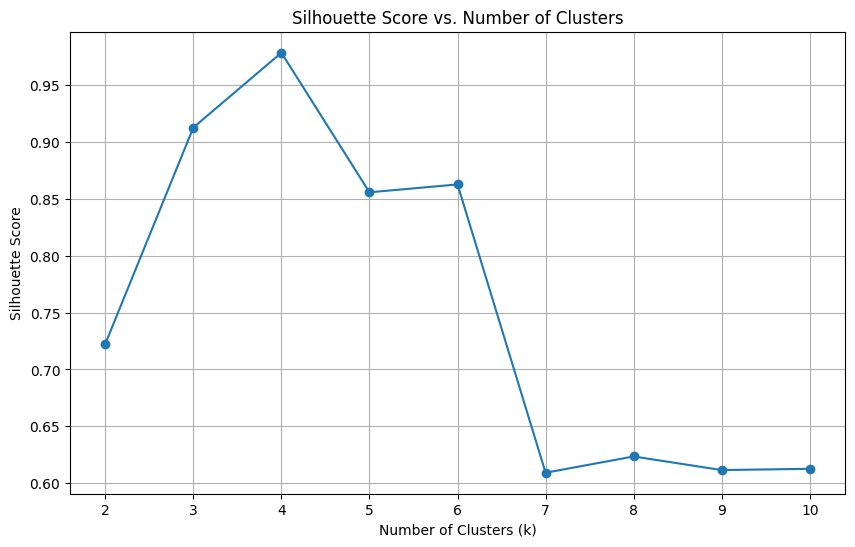

In [18]:
plot_silhouette_scores()

In [21]:
# Cell 15: Visualize Clustering Results (when running locally)
# -----------------------------------------------------------
def visualize_clusters():
    # Convert to pandas for visualization
    cluster_pd = kmeans_predictions.toPandas()

    # Plot the clusters
    plt.figure(figsize=(10, 8))

    # Plot points with predicted clusters
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(cluster_pd["feature1"], cluster_pd["feature2"],
                         c=cluster_pd["prediction"], cmap="viridis", alpha=0.8)

    # Plot cluster centers
    for i, center in enumerate(centers):
        plt.scatter(center[0], center[1], s=200, c='red', marker='X',
                    edgecolors='black', label=f'Cluster {i} center')

    plt.title("K-means Clustering Results (k=4)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()

    # Plot points with true labels
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(cluster_pd["feature1"], cluster_pd["feature2"],
                         c=cluster_pd["label"], cmap="viridis", alpha=0.8)
    plt.title("True Clusters")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    plt.tight_layout()
    plt.show()

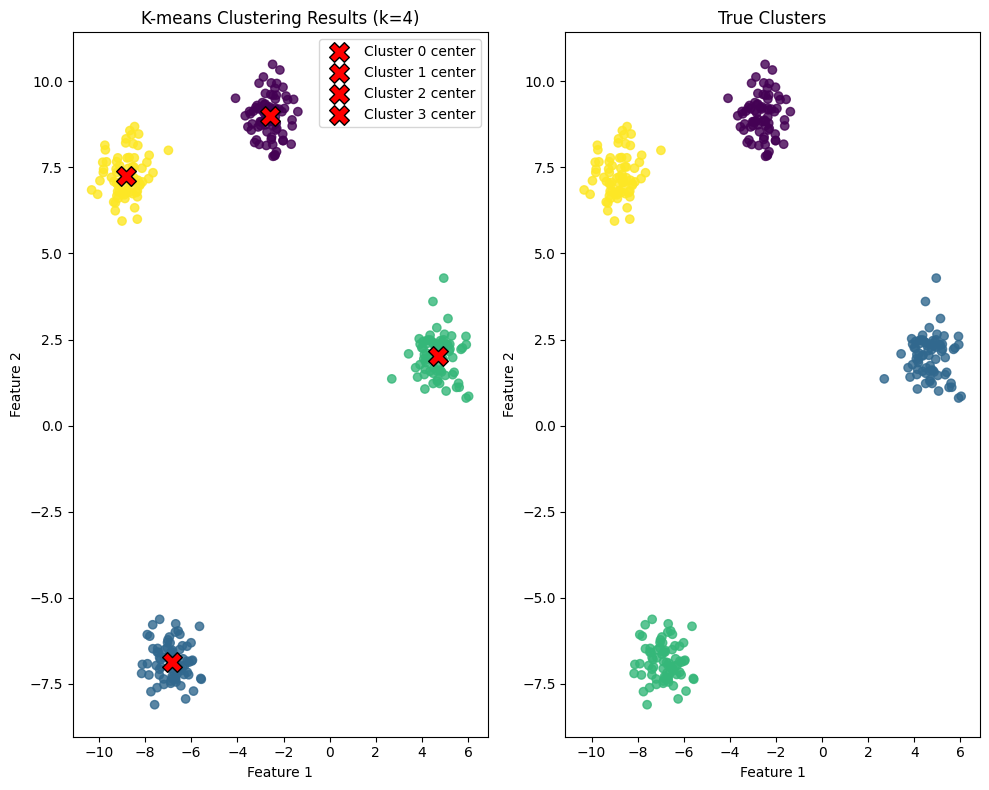

In [22]:
visualize_clusters()

In [25]:
import requests
import io
import tempfile

# Cell 16: Working with Categorical Features - Adult Income Dataset
# ---------------------------------------------------------------
# Load the Adult Income dataset - contains both categorical and numerical features
adult_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
adult_columns = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]

# Fetch data from the URL
response = requests.get(adult_data_url)
response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)
adult_data = response.text

# Create a temporary file to store the data
with tempfile.NamedTemporaryFile(mode='w', delete=False) as temp_file:
    temp_file.write(adult_data)
    temp_file_path = temp_file.name

# Load data using Spark's read.csv from the temporary file path
adult_df = spark.read.csv(temp_file_path, header=False, inferSchema=True) # Use the temporary file path
adult_df = adult_df.toDF(*adult_columns)

print("Adult Income Dataset:")
adult_df.show(5)
adult_df.printSchema()

Adult Income Dataset:
+---+-----------------+--------+----------+-------------+-------------------+------------------+--------------+------+-------+------------+------------+--------------+--------------+------+
|age|        workclass|  fnlwgt| education|education_num|     marital_status|        occupation|  relationship|  race|    sex|capital_gain|capital_loss|hours_per_week|native_country|income|
+---+-----------------+--------+----------+-------------+-------------------+------------------+--------------+------+-------+------------+------------+--------------+--------------+------+
| 39|        State-gov| 77516.0| Bachelors|         13.0|      Never-married|      Adm-clerical| Not-in-family| White|   Male|      2174.0|         0.0|          40.0| United-States| <=50K|
| 50| Self-emp-not-inc| 83311.0| Bachelors|         13.0| Married-civ-spouse|   Exec-managerial|       Husband| White|   Male|         0.0|         0.0|          13.0| United-States| <=50K|
| 38|          Private|21564

In [27]:

# Cell 17: Handling Categorical Features
# -------------------------------------
# Identify categorical and numerical columns
categorical_cols = ["workclass", "education", "marital_status", "occupation",
                    "relationship", "race", "sex", "native_country"]
numerical_cols = ["age", "fnlwgt", "education_num", "capital_gain",
                  "capital_loss", "hours_per_week"]

# Label indexing for the target
label_indexer = StringIndexer(inputCol="income", outputCol="label")

# String indexers for categorical features
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index", handleInvalid="keep")
            for col in categorical_cols]

# One-hot encoding of indexed categorical features
encoders = [OneHotEncoder(inputCol=f"{col}_index", outputCol=f"{col}_vec")
            for col in categorical_cols]

# Assemble all features (numerical + one-hot encoded)
assembler_inputs = numerical_cols + [f"{col}_vec" for col in categorical_cols]
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="features")

In [28]:

# Cell 18: Build Complete Pipeline with Categorical Features
# --------------------------------------------------------
# Create the pipeline with all preprocessing steps
categorical_pipeline = Pipeline(stages=
    indexers +  # String indexers
    encoders +  # One-hot encoders
    [assembler, label_indexer]  # Feature assembler and label indexer
)

# Apply the pipeline
categorical_pipeline_model = categorical_pipeline.fit(adult_df)
categorical_processed = categorical_pipeline_model.transform(adult_df)

# Show the processed data
print("Processed Adult Data:")
categorical_processed.select("features", "label", "income").show(5)

# Split data
(adult_train, adult_test) = categorical_processed.randomSplit([0.8, 0.2], seed=42)

Processed Adult Data:
+--------------------+-----+------+
|            features|label|income|
+--------------------+-----+------+
|(108,[0,1,2,3,5,1...|  0.0| <=50K|
|(108,[0,1,2,5,7,1...|  0.0| <=50K|
|(108,[0,1,2,5,6,1...|  0.0| <=50K|
|(108,[0,1,2,5,6,2...|  0.0| <=50K|
|(108,[0,1,2,5,6,1...|  0.0| <=50K|
+--------------------+-----+------+
only showing top 5 rows



In [29]:

# Cell 19: Train Classification Model on Adult Dataset
# --------------------------------------------------
# Train a Random Forest model on the Adult dataset
adult_rf = RandomForestClassifier(
    featuresCol="features",
    labelCol="label",
    numTrees=20,
    maxDepth=10,
    seed=42
)

adult_rf_model = adult_rf.fit(adult_train)
adult_predictions = adult_rf_model.transform(adult_test)

# Evaluate the model
adult_evaluator = MulticlassClassificationEvaluator(
    labelCol="label",
    predictionCol="prediction",
    metricName="accuracy"
)

adult_accuracy = adult_evaluator.evaluate(adult_predictions)
print(f"Random Forest Accuracy on Adult Dataset: {adult_accuracy:.4f}")

# Other evaluation metrics
adult_evaluator.setMetricName("f1")
adult_f1 = adult_evaluator.evaluate(adult_predictions)
print(f"Random Forest F1 Score on Adult Dataset: {adult_f1:.4f}")

Random Forest Accuracy on Adult Dataset: 0.8455
Random Forest F1 Score on Adult Dataset: 0.8341


In [30]:
# Cell 20: Feature Importance Analysis
# -----------------------------------
# Get feature importance from the Random Forest model
def analyze_feature_importance(model, feature_names):
    # Get feature importance
    importances = model.featureImportances

    # Create a list of (feature, importance) tuples
    feature_importance = [(feature, float(importance))
                         for feature, importance in zip(feature_names, importances)]

    # Sort by importance (descending)
    feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

    return feature_importance

# Get feature names (this is an approximation as one-hot encoding expands features)
feature_names = numerical_cols + categorical_cols
top_features = analyze_feature_importance(adult_rf_model, feature_names)

print("Top 10 Features by Importance:")
for i, (feature, importance) in enumerate(top_features[:10]):
    print(f"{i+1}. {feature}: {importance:.4f}")

Top 10 Features by Importance:
1. capital_gain: 0.1149
2. education_num: 0.1124
3. age: 0.0953
4. hours_per_week: 0.0475
5. capital_loss: 0.0185
6. race: 0.0107
7. fnlwgt: 0.0070
8. education: 0.0042
9. sex: 0.0020
10. occupation: 0.0017


In [32]:
# Cell 21: Model Saving and Loading
# --------------------------------
# Save the preprocessing pipeline and model
from pyspark.ml.classification import RandomForestClassificationModel # Import RandomForestClassificationModel
from pyspark.ml import PipelineModel # Import PipelineModel
model_path = "file:///tmp/spark_ml_adult_model"
preprocessing_path = "file:///tmp/spark_ml_adult_preprocessing"

# Save the model
adult_rf_model.write().overwrite().save(model_path)

# Save the preprocessing pipeline
categorical_pipeline_model.write().overwrite().save(preprocessing_path)

# Load the model
loaded_model = RandomForestClassificationModel.load(model_path)
loaded_preprocessing = PipelineModel.load(preprocessing_path)

In [34]:
# Cell 22: Model Deployment - Batch Prediction
# -------------------------------------------
# Function to make batch predictions on new data
def batch_predict(new_data, preprocessing_model, ml_model):
    # Only apply preprocessing if the data hasn't been processed yet.
    # Check if the 'features' column exists to determine if data has been preprocessed
    if 'features' not in new_data.columns:
        processed_data = preprocessing_model.transform(new_data)
    else:
        processed_data = new_data  # Data is already processed

    # Make predictions
    predictions = ml_model.transform(processed_data)

    return predictions

# Example with a sample of the test data
sample_data = adult_test.limit(5)
batch_results = batch_predict(sample_data, categorical_pipeline_model, adult_rf_model)

# Show the prediction results
batch_results.select("features", "label", "prediction", "probability").show()

+--------------------+-----+----------+--------------------+
|            features|label|prediction|         probability|
+--------------------+-----+----------+--------------------+
|(108,[0,1,2,5,9,2...|  0.0|       0.0|[0.99220475351337...|
|(108,[0,1,2,5,9,2...|  0.0|       0.0|[0.98797258577637...|
|(108,[0,1,2,5,9,2...|  0.0|       0.0|[0.99220475351337...|
|(108,[0,1,2,5,9,2...|  0.0|       0.0|[0.99022806220796...|
|(108,[0,1,2,5,9,2...|  0.0|       0.0|[0.99294764905212...|
+--------------------+-----+----------+--------------------+



In [43]:

# Cell 23: Real-time Prediction with UDF
# -------------------------------------
# Create a UDF for real-time predictions
from pyspark.sql.types import DoubleType, ArrayType

# Create a model broadcast variable for efficiency
model_broadcast = spark.sparkContext.broadcast(adult_rf_model)

# Define prediction UDF
@udf(returnType=DoubleType())
def predict_income(features):
    # Use the broadcasted model to make prediction
    model = model_broadcast.value
    prediction = model.predict(features)
    return float(prediction)

# Apply UDF for real-time predictions
real_time_predictions = categorical_processed.withColumn(
    "rt_prediction",
    predict_income(col("features"))
)

# Show real-time predictions
real_time_predictions.select(
    "age", "workclass", "education", "income", "rt_prediction"
).show(10)

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyspark/broadcast.py", line 183, in dump
    pickle.dump(value, f, pickle_protocol)
TypeError: cannot pickle '_thread.RLock' object


PicklingError: Could not serialize broadcast: TypeError: cannot pickle '_thread.RLock' object

In [41]:

# Cell 24: Custom Evaluation Metrics
# ---------------------------------
# Function to calculate custom metrics
def calculate_custom_metrics(predictions):
    # Convert predictions to pandas for easier calculations
    pred_pd = predictions.select("label", "prediction").toPandas()

    # True positives, false positives, true negatives, false negatives
    tp = ((pred_pd["prediction"] == 1) & (pred_pd["label"] == 1)).sum()
    fp = ((pred_pd["prediction"] == 1) & (pred_pd["label"] == 0)).sum()
    tn = ((pred_pd["prediction"] == 0) & (pred_pd["label"] == 0)).sum()
    fn = ((pred_pd["prediction"] == 0) & (pred_pd["label"] == 1)).sum()

    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "confusion_matrix": {
            "tp": tp, "fp": fp,
            "tn": tn, "fn": fn
        }
    }


# Calculate custom metrics on the Adult dataset predictions
custom_metrics = calculate_custom_metrics(adult_predictions)
print("Custom Metrics:")
for metric, value in custom_metrics.items():
    if metric != "confusion_matrix":
        print(f"{metric}: {value:.4f}")
    else:
        print(f"{metric}: {value}")

Custom Metrics:
accuracy: 0.8455
precision: 0.7720
recall: 0.5174
f1: 0.6196
confusion_matrix: {'tp': np.int64(816), 'fp': np.int64(241), 'tn': np.int64(4667), 'fn': np.int64(761)}


In [42]:

# Cell 25: Clean up and Close
# --------------------------
# Stop the Spark session
spark.stop()
print("Spark session stopped.")

Spark session stopped.
